In [1]:
import numpy as np

In [2]:
def evalf(x):
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments
  return (x[0]-10)**2 + (x[1]+2)**2

In [3]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]-10),2*(x[1]+2)])

In [4]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, k, fvals 

In [5]:
## 2.ANSWER:

my_start_x = np.array([0,0])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, k, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
print("\nfvals_ret = ",fvals_ret)
print("\nRequired minimizer is = ", opt_x)
print("\nMinimum value of the function f(x) = ", fvals_ret[-1])


fvals_ret =  [104, 66.56, 42.598400000000005, 27.26297599999999, 17.448304639999993, 11.166914969599999, 7.146825580543998, 4.573968371548158, 2.927339757790822, 1.8734974449861252, 1.1990383647911187, 0.7673845534663153, 0.49112611421844227, 0.3143207130998035, 0.20116525638387422, 0.12874576408567975, 0.08239728901483524, 0.05273426496949439, 0.033749929580476165, 0.021599954931504538, 0.013823971156162988, 0.008847341539944315, 0.005662298585564255, 0.00362387109476104, 0.0023192775006471342, 0.0014843376004141109, 0.0009499760642649876, 0.0006079846811296092, 0.0003891101959229774, 0.0002490305253907061, 0.00015937953625006111, 0.00010200290320004633, 6.528185804801811e-05, 4.17803891507361e-05, 2.6739449056471013e-05, 1.711324739614714e-05, 1.0952478333534284e-05, 7.00958613346019e-06, 4.486135125415997e-06, 2.8711264802662087e-06, 1.8375209473723096e-06, 1.1760134063175602e-06, 7.526485800438734e-07, 4.816950912285504e-07, 3.0828485838706536e-07, 1.9730230936739685e-07]

Require

**2. ANSWER:** \
**Required minimizer is =  ( 9.99956444 ,  -1.99991289)** \

**Minimum value of the function f(x) =  1.9730230936739685e-07**

**3. SOLUTION:**

In [6]:
my_start_x = np.array([0,0])
my_steplength = 0.1
tol_list = [10**(-j) for j in range(1,13)]
#minimizer_list = []
#object_val_list = [] 
iterations_list = []
for my_tol in tol_list:
  opt_x, k, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
  #minimizer_list.append(opt_x)
  #object_val_list.append(fvals_ret[-1])
  iterations_list.append(k)
  print('for tolerance = ',my_tol,', iter:',k, ', final minimizer: ',opt_x, ', final objective function value = : ',fvals_ret[-1]) 

#print(minimizer_list)
#print(len(minimizer_list))
#print(object_val_list) 
#print(len(object_val_list)) 

for tolerance =  0.1 , iter: 24 , final minimizer:  [ 9.95277634 -1.99055527] , final objective function value = :  0.0023192775006471342
for tolerance =  0.01 , iter: 35 , final minimizer:  [ 9.99594352 -1.9991887 ] , final objective function value = :  1.711324739614714e-05
for tolerance =  0.001 , iter: 45 , final minimizer:  [ 9.99956444 -1.99991289] , final objective function value = :  1.9730230936739685e-07
for tolerance =  0.0001 , iter: 55 , final minimizer:  [ 9.99995323 -1.99999065] , final objective function value = :  2.2747407537494312e-09
for tolerance =  1e-05 , iter: 66 , final minimizer:  [ 9.99999598 -1.9999992 ] , final objective function value = :  1.6784624208878184e-11
for tolerance =  1e-06 , iter: 76 , final minimizer:  [ 9.99999957 -1.99999991] , final objective function value = :  1.9351354112991892e-13
for tolerance =  1e-07 , iter: 86 , final minimizer:  [ 9.99999995 -1.99999999] , final objective function value = :  2.2310591544756755e-15
for tolerance =  

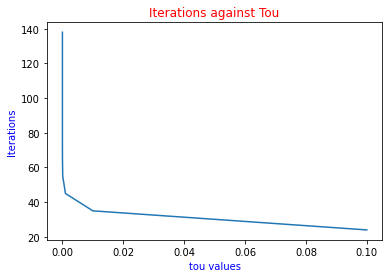

In [7]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(width,height))
plt.plot(tol_list, iterations_list)
plt.xlabel('tou values',color='b')
plt.ylabel('Iterations',color='b')
plt.title('Iterations against Tou',color='r')
plt.show()

**Comments :** \\
**1.** Here it is obvious from the above graph that as the value of tolerance \  \ increases the number of iterations required to achieve the minmizer decreases. \\
**2.** here for the decreasing values of tolerance the objective function value also decreases.

**4. SOLUTION:**

In [8]:
my_start_x = np.array([0,0])
my_tol= 1e-5 #10^{-5} or 0.00001
step_len_list = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
iterations_list = []

for my_steplength in step_len_list:
  opt_x, k, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
  iterations_list.append(k)
  print('for step length = ',my_steplength,', iter:',k, ', final minimizer: ',opt_x, ', final objective function value = : ',fvals_ret[-1]) 

for step length =  0.001 , iter: 7257 , final minimizer:  [ 9.9999951  -1.99999902] , final objective function value = :  2.498673920657803e-11
for step length =  0.01 , iter: 720 , final minimizer:  [ 9.99999518 -1.99999904] , final objective function value = :  2.413138986248596e-11
for step length =  0.05 , iter: 138 , final minimizer:  [ 9.99999515 -1.99999903] , final objective function value = :  2.443238955704627e-11
for step length =  0.1 , iter: 66 , final minimizer:  [ 9.99999598 -1.9999992 ] , final objective function value = :  1.6784624208878184e-11
for step length =  0.2 , iter: 29 , final minimizer:  [ 9.99999632 -1.99999926] , final objective function value = :  1.4119062525609656e-11
for step length =  0.3 , iter: 16 , final minimizer:  [ 9.99999571 -1.99999914] , final objective function value = :  1.9184613833248683e-11
for step length =  0.4 , iter: 10 , final minimizer:  [ 9.99999898 -1.9999998 ] , final objective function value = :  1.0905190389247573e-12
for step

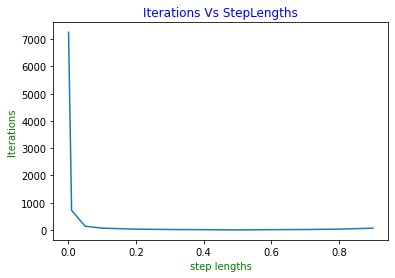

In [9]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(width,height))
plt.plot(step_len_list , iterations_list)
plt.xlabel('step lengths',color='g')
plt.ylabel('Iterations',color='g')
plt.title('Iterations Vs StepLengths',color='b')
plt.show()

**Comments :**\\
1. here for increasing step lengths the number of iterations decreases \\
2.also as the step length increases the objectivefunction value first decreases to 0  then increases.

**5. SOLUTION:**

In [10]:
import pandas as pd

In [11]:
start_x_list = [(1000, 1000), (500, 100), (50, 50), (10, 50), (50, -2)]
my_steplength = 0.1
my_tol= 1e-5 #10^{-5} or 0.00001

iterations_list = []
minimizer_list = []
object_val_list = [] 

for my_start_x in start_x_list:
  opt_x, k, fvals_ret = find_minimizer(np.array(my_start_x), my_tol, my_steplength)
  minimizer_list.append(opt_x)
  object_val_list.append(fvals_ret[-1])
  iterations_list.append(k)

dataframe = pd.DataFrame({'Start_Points':start_x_list,  'Iteration_No.':iterations_list, 'minimizer':minimizer_list, 'Obj_func_val':object_val_list})
dataframe

,Start_Points,Iteration_No.,minimizer,Obj_func_val
0,"(1000, 1000)",88,"[10.000002934634711, -1.9999970297939607]",1.743420e-11
1,"(500, 100)",83,"[10.000004432665916, -1.999999077281789]",2.049994e-11
2,"(50, 50)",74,"[10.000002695994667, -1.9999964952069333]",1.955196e-11
3,"(10, 50)",73,"[10.0, -1.9999956190086667]",1.919309e-11
4,"(50, -2)",72,"[10.000004212491667, -2.0]",1.774509e-11


**Comments:** \\
1.here the number of iterations is small if we are close to the minimizer of the function and as we go away from the minimizer the number of iterations increases.